<a href="https://colab.research.google.com/github/kchansen94/IST644_Final_Project/blob/main/IST644_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib as plt

# Load the dataset
reviewDF = pd.read_csv(r'/content/steam_game_reviews.csv')

# Display the first few rows of the dataframe
print(reviewDF.head())

# Data frame summary
reviewDF.shape
reviewDF.columns


                                              review hours_played helpful  \
0  The game itself is also super fun. The PvP and...         39.9   1,152   
1  Never cared much about Warhammer until this ga...         91.5     712   
2  A salute to all the fallen battle brothers who...         43.3     492   
3  this game feels like it was made in the mid 20...         16.8     661   
4  Reminds me of something I've lost. A genuine g...         24.0     557   

  funny recommendation          date                         game_name  \
0    13    Recommended  14 September  Warhammer 40,000: Space Marine 2   
1   116    Recommended  13 September  Warhammer 40,000: Space Marine 2   
2    33    Recommended  14 September  Warhammer 40,000: Space Marine 2   
3    15    Recommended  14 September  Warhammer 40,000: Space Marine 2   
4     4    Recommended  12 September  Warhammer 40,000: Space Marine 2   

                             username  
0  Sentinowl\n224 products in account  
1    userpig

<ipython-input-1-ca2b346e25cc>:8: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  reviewDF = pd.read_csv(r'/content/steam_game_reviews.csv')


Index(['review', 'hours_played', 'helpful', 'funny', 'recommendation', 'date',
       'game_name', 'username'],
      dtype='object')

recommendation
Recommended        805782
Not Recommended    186371
Name: count, dtype: int64


<ipython-input-2-392a87d88aa6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rec_counts.index, y=rec_counts.values, palette = 'RdBu')


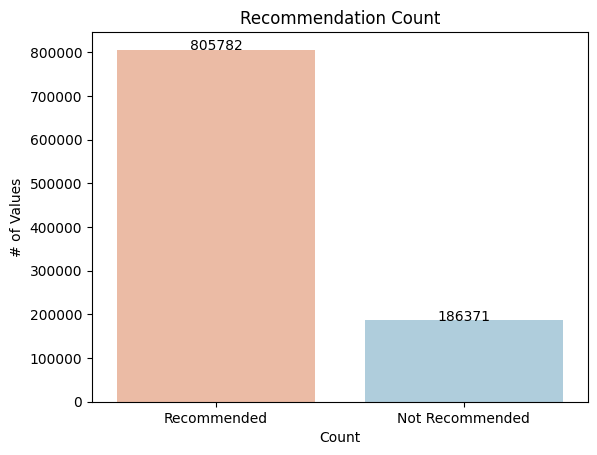

In [2]:
# Count of recommended responses
rec_counts = reviewDF['recommendation'].value_counts()
print(rec_counts)

# Recommendation Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=rec_counts.index, y=rec_counts.values, palette = 'RdBu')
plt.title('Recommendation Count')
plt.xlabel('Count')
plt.ylabel('# of Values')
for i, v in enumerate(rec_counts.values):
  plt.text(i, v + 0.1, str(v), ha='center')
plt.show()


In [3]:
# Reviews Helpful Stats
# Remove commas from the 'helpful' column and convert to numeric values (int)
# replacing non-numeric values with NaN
reviewDF['helpful'] = reviewDF['helpful'].str.replace(',', '').astype('float').astype('Int64')


# Average helpful score
ave_helpful = np.mean(reviewDF['helpful'])
print("Average: {:.2f}".format(ave_helpful))

# High and Low Helpful score
min_helpful = np.min(reviewDF['helpful'])
print("Lowest Score: {:.2f}".format(min_helpful))

max_helpful = np.max(reviewDF['helpful'])
print("Highest Score: {}".format(max_helpful))


Average: 22.54
Lowest Score: 0.00
Highest Score: 38446


In [7]:
# Reviews Hours Played

# Ensure the 'hours_played' column is numeric and handle any non-numeric values
reviewDF['hours_played'] = pd.to_numeric(reviewDF['hours_played'], errors='coerce')

# Calculate the average hours played handling missing values
ave_hours = np.mean(reviewDF['hours_played'].dropna())
print("Average: {:.1f}".format(ave_hours))

# Calculate the minimum hours played handling missing values
min_hours = np.min(reviewDF['hours_played'].dropna())
print("Lowest: {:.1f}".format(min_hours))

# Calculate the maximum hours played, handling missing values
max_hours = np.max(reviewDF['hours_played'].dropna())
print("Highest: {:.1f}".format(max_hours))


Average: 128.7
Lowest: 0.0
Highest: 999.9


In [11]:
# Group by game and count the number of reviews per game
reviews_per_game = reviewDF.groupby('game_name')['review'].count().reset_index()
reviews_per_game.columns = ['Game Name', 'Number of Reviews']

# Display the table
print(reviews_per_game)

# If you want to display the table in a more readable format in a Jupyter notebook or Google Colab
import IPython.display as display
display.display(reviews_per_game)



                        Game Name  Number of Reviews
0                        69 Balls                120
1                   7 Days to Die               5010
2          ARK: Survival Ascended               4940
3           ARK: Survival Evolved               5010
4     Age of Empires II (Retired)               5010
..                            ...                ...
237         Yu-Gi-Oh! Master Duel               4999
238                    eFootball™               5010
239                       iRacing               2598
240                      shapez 2               4712
241  theHunter: Call of the Wild™               5010

[242 rows x 2 columns]


,Game Name,Number of Reviews
0,69 Balls,120
1,7 Days to Die,5010
2,ARK: Survival Ascended,4940
3,ARK: Survival Evolved,5010
4,Age of Empires II (Retired),5010
...,...,...
237,Yu-Gi-Oh! Master Duel,4999
238,eFootball™,5010
239,iRacing,2598
240,shapez 2,4712


from matplotlib import pyplot as plt
reviews_per_game['Number of Reviews'].plot(kind='hist', bins=20, title='Number of Reviews')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
reviews_per_game['Number of Reviews'].plot(kind='line', figsize=(8, 4), title='Number of Reviews')
plt.gca().spines[['top', 'right']].set_visible(False)